<a href="https://colab.research.google.com/github/Kevin2558/Data_Science_Borrador/blob/main/03_Transformaciones/t_SNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# t-SNE

Esta vez vamos a importar un dataset que viene incluido en sklearn.

El dataset trae matrices de 8x8 con valores entre 0-16 que representan la oscuridad de la celda para visualizar numeros escritos a mano.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

In [ ]:
digits = load_digits()

In [ ]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 640x480 with 0 Axes>

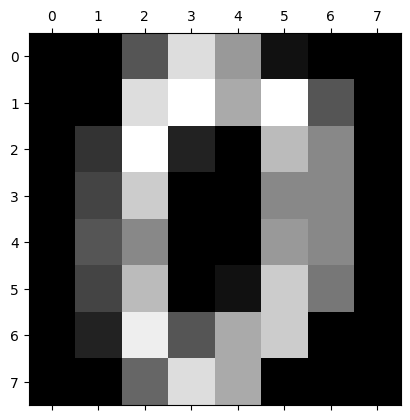

In [ ]:
plt.gray()
plt.matshow(digits.images[0])
plt.show()

Notemos que son 64 variables las que definen una fila (un numero). El dataset ya tiene separados los valores de entrenamiento y prediccion:

In [ ]:
X = digits.data
Y = digits.target

Ahora, antes de hacer la reduccion de dimensionalidades, tenemos que escalarlos debido a que son numeros entre 0-16.

In [ ]:
X_scaled = StandardScaler().fit_transform(X)

Usaremos el modelo de reduccion de dimensionalidad TSNE. Este es un modelo no lineal, por lo que se ocupa una metodologia de entrenamiento para poder encontrar las variables mas importantes. Se utiliza porque es muy rapido y eficiente para poder visualizar.

In [ ]:
tsne = TSNE(n_components=2, # Numero de componentes
            perplexity=48, # Vecinos cercanos
            learning_rate=200, # Taza de aprendizaje
            random_state=42) # Semilla

X_tsne = tsne.fit_transform(X_scaled)

Ahora procedamos a graficar.

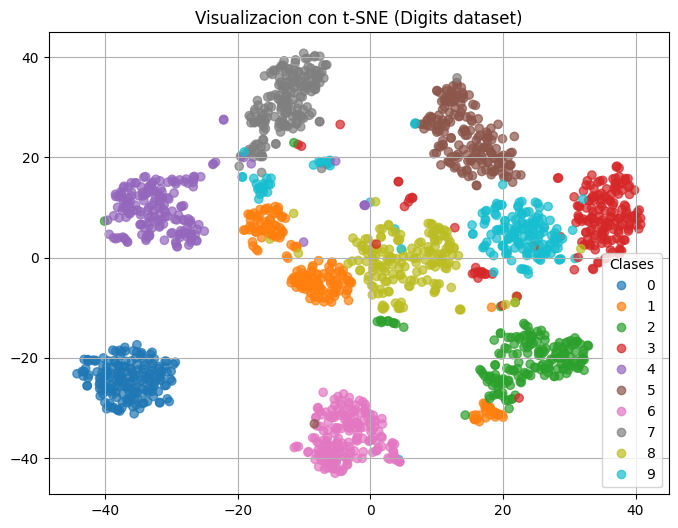

In [ ]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_tsne[:,0], X_tsne[:,1], c=Y, cmap='tab10', alpha=0.7)
plt.legend(*scatter.legend_elements(),title="Clases")
plt.title("Visualizacion con t-SNE (Digits dataset)")
plt.grid(True)
plt.show()

Notemos que anteriormente no se podia visualizar las clases debido a que estas venian en formato matricial. Por lo que ahora al reducir las 64 variables a 2, podemos visualizar sus proyecciones.

Las cosas que podemos observar son:

- Cada punto representa un número

- Hay numero que pueden tender a confundirse con otros. Por ejemplo, varios 3 se acercan a las clases del 8 y 9.

- Hay algunas clases que están un tanto desagrupadas, mientras otras están totalmente definidas. Por ejemplo la clase del 9 se acerca tanto a la del 3 como a la del 7 y por otro lado, la clase del 0 está totalmente aislada. Por lo que uno podria querer mas variables para poder clasificar mejor.